Lifecycle of Data Science 
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [2]:
# importing dataset
df = pd.read_csv("../data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

Data analysis phase finding the following thing
1. Missing values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(Target)

Missing Values

In [5]:
missing_val = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in missing_val:
    print(feature, np.round(df[feature].isnull().mean(), 3), "% missing values")

Since there are no missing values we can proceed further with the data analysis

Numerical Variables

In [12]:
# finding numerical values
numerical_val = [features for features in df.columns if df[features].isnull().dtypes != 'O']

# printing the values
print("numerical values ", len(numerical_val))

df[numerical_val].head()

numerical values  14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
# Discrete numerical or Continuous numerical
values = df.drop('target', axis=1)
discrete_val = [features for features in values if len(df[features].unique())<6]

print("Discrete value count {}".format(len(discrete_val)))


Discrete value count 8


In [43]:
discrete_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [44]:
df[discrete_val].head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


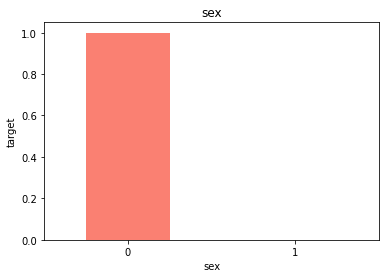

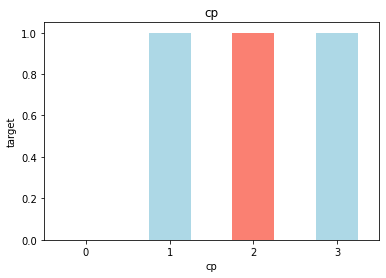

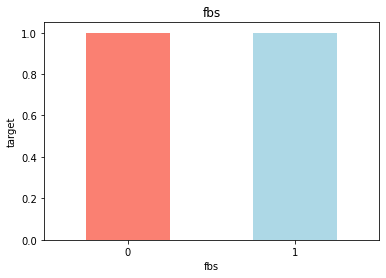

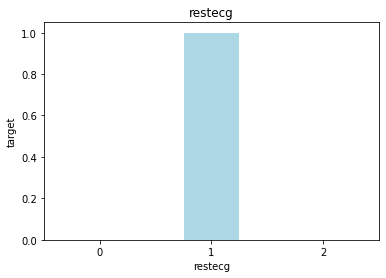

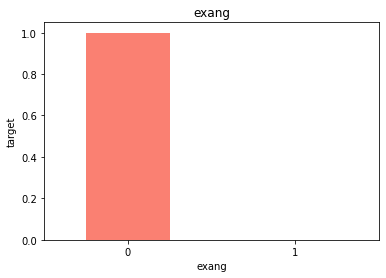

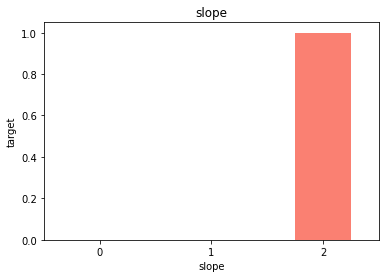

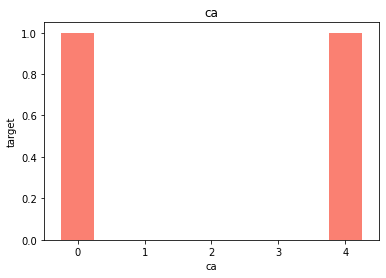

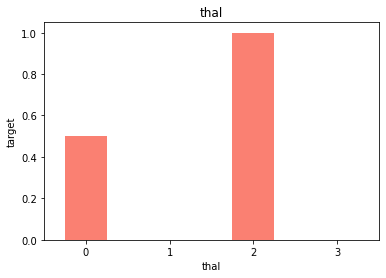

In [48]:
# Relationship between discrete_val and Target
for feature in discrete_val:
    data = df.copy()
    data.groupby(feature)['target'].median().plot(kind='bar', color=["salmon", "lightblue"])
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.title(feature)
    plt.xticks(rotation=True)
    plt.show()

In [49]:
## There are some relation between discrete_val and target 

Continuous Variable

In [52]:
continuous_val = [features for features in values if features not in discrete_val]

print("Continuous value count {}".format(len(continuous_val)))


Continuous value count 5


In [53]:
continuous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [55]:
df[continuous_val].head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


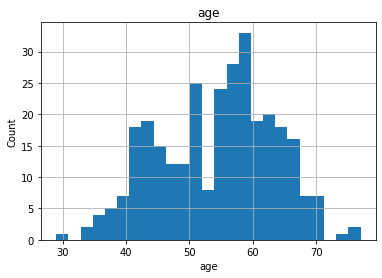

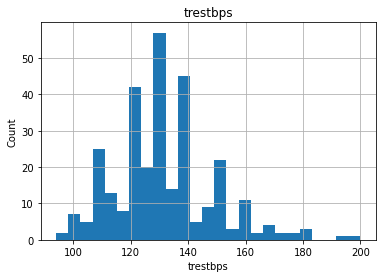

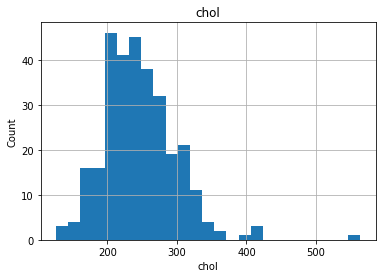

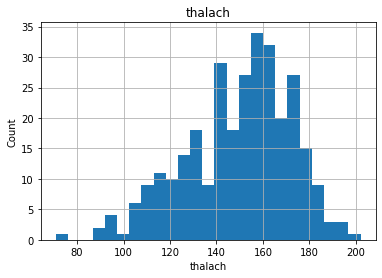

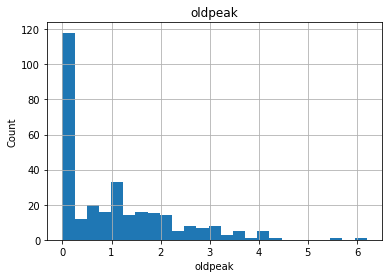

In [60]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_val:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

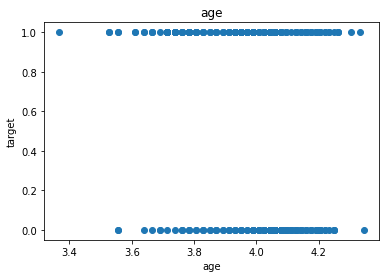

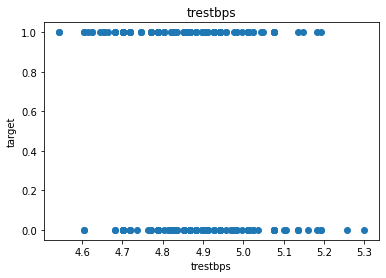

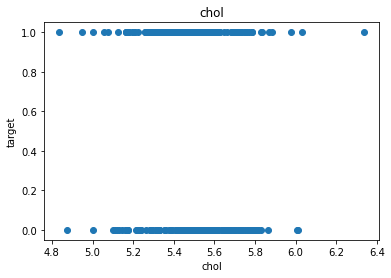

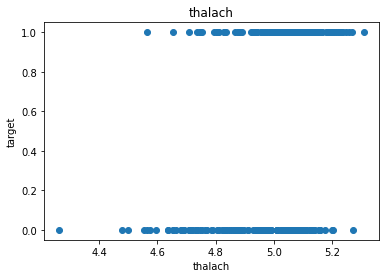

In [66]:
# logarithmic Transformation of Continuous values

for feature in continuous_val:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        plt.scatter(data[feature], data['target'])
        plt.xlabel(feature)
        plt.ylabel("target")
        plt.title(feature)
        plt.show()

In [73]:
data[feature]

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64

Outliers

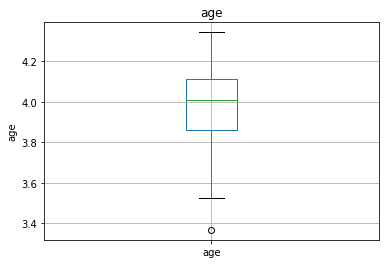

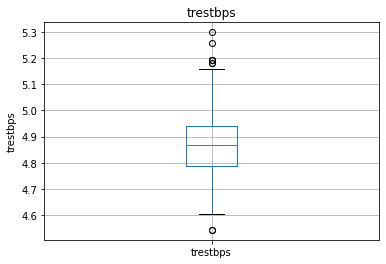

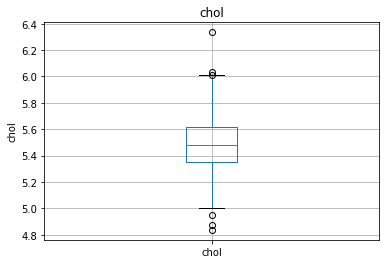

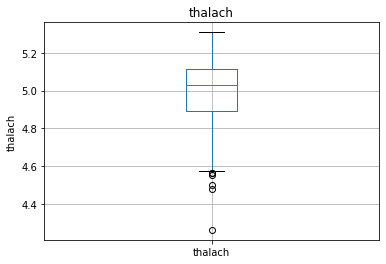

In [69]:
for feature in continuous_val:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [71]:
oldpeak = np.log(df['oldpeak'])

d:\datascience-main\datascience-main\ds\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [72]:
oldpeak

0      0.832909
1      1.252763
2      0.336472
3     -0.223144
4     -0.510826
         ...   
298   -1.609438
299    0.182322
300    1.223775
301    0.182322
302        -inf
Name: oldpeak, Length: 303, dtype: float64

Categorical Values

In [75]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

[]

There are no categorical features in the dataset we can proceed with feature engineering

1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range


In [77]:
# There will be a chance of data leakage so we will split the data and then do the engineering
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,df['target'],test_size=0.1,random_state=0)

In [78]:
X_train.shape, X_test.shape

((272, 14), (31, 14))

Missing Values

In [81]:
# Missing Values
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in feature_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

In [82]:
print(feature_nan)

[]


Handling outliers

In [83]:
q1, q3 = np.percentile(df[continuous_val], [25, 75])

In [84]:
q1, q3

(47.5, 168.0)